In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

import imblearn
from imblearn.over_sampling import SMOTE

In [32]:
Claim_Data = pd.read_excel('Claim_Data.xlsm')

In [33]:
Predictor_Dataset = pd.read_excel('Predictor_Dataset.xlsm')

In [34]:
Predictor_Dataset.head()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,hoh_married,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,curnt_insurer,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode
0,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741
1,13778,1,1,35.644631,35.644631,35.644631,35.644631,235.735566,235.735566,235.735566,235.735566,0,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,1.5,1,25000.0,1,1,NaN,0,0,0,1,1,0,25,25,684.650216,87884
2,16063,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,1,False,1,0,0.0,0,2,2.0,0,FARMERS,5.0,1,50000.0,0,1,NaN,0,0,0,1,1,1,100,100,596.318289,81525
3,12789,1,1,17.882127,17.882127,17.882127,17.882127,22.585530,22.585530,22.585530,22.585530,1,1,0,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,0.0,1,100000.0,1,0,NaN,0,0,1,1,1,1,100,100,636.757859,35741
4,5122,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,2.5,1,25000.0,0,0,NaN,0,0,0,0,1,1,50,50,669.569992,59792


In [35]:
Subsequent_Loss_Experience = pd.read_excel('Subsequent_Loss_Experience.xlsm')

In [36]:
Subsequent_Loss_Experience.head()

,hhld_id,premium,loss_amount,loss_ratio,future_clm_ind
0,15937,133.6,0.0,0.0,0
1,13778,145.8,0.0,0.0,0
2,16063,167.0,0.0,0.0,0
3,12789,150.3,0.0,0.0,0
4,5122,117.0,0.0,0.0,0


In [37]:
df = pd.merge(Predictor_Dataset,Subsequent_Loss_Experience,how='inner',on='hhld_id')

In [38]:
df.head()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,hoh_married,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,curnt_insurer,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind
0,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.0,0.0,0
1,13778,1,1,35.644631,35.644631,35.644631,35.644631,235.735566,235.735566,235.735566,235.735566,0,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,1.5,1,25000.0,1,1,NaN,0,0,0,1,1,0,25,25,684.650216,87884,145.8,0.0,0.0,0
2,16063,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,1,False,1,0,0.0,0,2,2.0,0,FARMERS,5.0,1,50000.0,0,1,NaN,0,0,0,1,1,1,100,100,596.318289,81525,167.0,0.0,0.0,0
3,12789,1,1,17.882127,17.882127,17.882127,17.882127,22.585530,22.585530,22.585530,22.585530,1,1,0,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,0.0,1,100000.0,1,0,NaN,0,0,1,1,1,1,100,100,636.757859,35741,150.3,0.0,0.0,0
4,5122,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,2.5,1,25000.0,0,0,NaN,0,0,0,0,1,1,50,50,669.569992,59792,117.0,0.0,0.0,0


In [39]:
Claim_Data

,hhld_id,clm_dates,aft_ind,pd_amt
0,6599,2010-12-09,1,5736.39
1,1454,2010-06-14,1,3257.49
2,13691,2011-01-08,1,8190.45
3,10347,2014-02-09,0,428.48
4,6051,2010-03-31,0,107.57
...,...,...,...,...
4995,5567,2012-06-02,0,897.82
4996,3554,2011-07-16,1,6387.09
4997,12332,2014-01-13,0,534.27
4998,11310,2011-07-11,1,7709.68


In [40]:
Claim_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   hhld_id    5000 non-null   int64         
 1   clm_dates  5000 non-null   datetime64[ns]
 2   aft_ind    5000 non-null   int64         
 3   pd_amt     5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 156.4 KB


In [41]:
# Criteria: Consider claim with at least one dollar paid out and be prior to the Application Date January 1, 2017.
Claim_Data_1 = Claim_Data[(Claim_Data['clm_dates'] < '2017-01-01') & (Claim_Data['pd_amt'] >= 1)]

In [42]:
Claim_Data_1

,hhld_id,clm_dates,aft_ind,pd_amt
0,6599,2010-12-09,1,5736.39
1,1454,2010-06-14,1,3257.49
2,13691,2011-01-08,1,8190.45
3,10347,2014-02-09,0,428.48
4,6051,2010-03-31,0,107.57
...,...,...,...,...
4995,5567,2012-06-02,0,897.82
4996,3554,2011-07-16,1,6387.09
4997,12332,2014-01-13,0,534.27
4998,11310,2011-07-11,1,7709.68


In [43]:
df

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,hoh_married,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,curnt_insurer,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind
0,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.0,0.0,0
1,13778,1,1,35.644631,35.644631,35.644631,35.644631,235.735566,235.735566,235.735566,235.735566,0,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,1.5,1,25000.0,1,1,NaN,0,0,0,1,1,0,25,25,684.650216,87884,145.8,0.0,0.0,0
2,16063,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,1,False,1,0,0.0,0,2,2.0,0,FARMERS,5.0,1,50000.0,0,1,NaN,0,0,0,1,1,1,100,100,596.318289,81525,167.0,0.0,0.0,0
3,12789,1,1,17.882127,17.882127,17.882127,17.882127,22.585530,22.585530,22.585530,22.585530,1,1,0,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,0.0,1,100000.0,1,0,NaN,0,0,1,1,1,1,100,100,636.757859,35741,150.3,0.0,0.0,0
4,5122,1,1,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,2.5,1,25000.0,0,0,NaN,0,0,0,0,1,1,50,50,669.569992,59792,117.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7971,1,1,22.317612,22.317612,22.317612,22.317612,75.811340,75.811340,75.811340,75.811340,0,0,1,0,1,False,1,0,0.0,0,0,0.0,0,MISSING,NaN,0,NaN,0,1,NaN,0,0,0,0,0,0,25,25,730.524944,52758,80.0,0.0,0.0,0
19996,5143,2,1,22.480599,50.319074,50.319074,36.399836,77.767185,411.828883,411.828883,244.798034,0,1,1,1,1,True,1,0,0.0,0,0,0.0,0,ALLSTATE,3.5,1,100000.0,0,1,NaN,0,0,0,0,0,0,50,50,733.680364,92002,80.0,0.0,0.0,0
19997,2554,2,2,42.579635,47.374177,47.374177,44.976906,318.955620,376.490121,376.490121,347.722870,0,0,2,2,0,True,2,0,0.0,0,1,0.5,0,PROGRESSIVE,5.0,1,50000.0,1,1,NaN,0,0,0,1,1,1,25,25,689.594122,77155,222.3,0.0,0.0,0
19998,6,1,1,46.832826,46.832826,46.832826,46.832826,369.993911,369.993911,369.993911,369.993911,0,1,0,0,1,False,1,0,0.0,0,0,0.0,0,MISSING,NaN,0,NaN,1,1,0.0,0,1,0,1,1,1,25,25,682.152566,87035,150.3,0.0,0.0,0


In [44]:
df1 = pd.merge(df,Claim_Data_1,how='inner',on='hhld_id')

In [45]:
df1

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,hoh_married,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,curnt_insurer,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,clm_dates,aft_ind,pd_amt
0,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,2012-10-11,0,84.08
1,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,2012-09-18,1,4159.63
2,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,2010-06-11,0,301.78
3,11886,4,3,19.318661,43.789978,43.789978,37.672149,39.823932,333.479735,333.479735,260.065785,0,2,2,2,2,True,3,0,0.0,0,0,0.0,0,ALLSTATE,5.0,1,50000.0,0,1,NaN,0,0,0,2,2,0,25,25,413.262688,16107,384.0,0.000000,0.000000,0,2016-11-15,0,218.28
4,9155,2,2,25.277394,42.306708,42.306708,33.792051,111.328723,315.680500,315.680500,213.504611,0,0,2,2,0,True,2,0,0.0,0,0,0.0,0,ALLSTATE,1.5,1,25000.0,1,0,NaN,0,2,0,2,2,1,100,100,612.255960,85767,278.1,1353.605481,4.867334,1,2014-06-01,0,307.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,15982,1,1,45.270701,45.270701,45.270701,45.270701,304.568093,257.887778,257.887778,257.887778,0,0,1,0,1,False,1,0,0.0,0,3,3.0,0,OTHER,0.5,1,100000.0,1,0,NaN,0,0,1,0,0,0,25,25,729.977695,15290,72.0,0.000000,0.000000,0,2014-09-01,1,5897.04
4884,15982,1,1,45.270701,45.270701,45.270701,45.270701,304.568093,257.887778,257.887778,257.887778,0,0,1,0,1,False,1,0,0.0,0,3,3.0,0,OTHER,0.5,1,100000.0,1,0,NaN,0,0,1,0,0,0,25,25,729.977695,15290,72.0,0.000000,0.000000,0,2015-02-07,0,249.08
4885,9609,1,1,33.897529,33.897529,33.897529,33.897529,214.770349,214.770349,214.770349,214.770349,0,1,0,0,1,False,1,0,0.0,0,0,0.0,0,LIBERTY MUTUAL,5.0,1,100000.0,1,1,NaN,0,0,0,0,1,1,50,50,567.947243,32997,105.3,0.000000,0.000000,0,2010-03-27,0,415.25
4886,2554,2,2,42.579635,47.374177,47.374177,44.976906,318.955620,376.490121,376.490121,347.722870,0,0,2,2,0,True,2,0,0.0,0,1,0.5,0,PROGRESSIVE,5.0,1,50000.0,1,1,NaN,0,0,0,1,1,1,25,25,689.594122,77155,222.3,0.000000,0.000000,0,2015-04-23,0,261.78


In [46]:
df1.shape
#4888 rows, 48 columns

(4888, 48)

In [47]:
df1.columns

Index(['hhld_id', 'drvr_cnt', 'veh_cnt', 'min_age', 'hoh_age', 'max_age',
       'avg_age', 'min_mon_lic', 'hoh_mon_lic', 'max_mon_lic', 'avg_mon_lic',
       'cnt_yth', 'cnt_female', 'cnt_male', 'cnt_married', 'cnt_single',
       'hoh_married', 'cnt_auto', 'cnt_mtrcyc', 'avg_majr_viol',
       'cnt_majr_viol', 'cnt_minr_viol', 'avg_minr_viol', 'cnt_lic_susp',
       'curnt_insurer', 'time_w_carr', 'inforce_ind', 'prior_bi', 'fire_ind',
       'homeowner_ind', 'veh_lien_cnt', 'veh_lease_cnt', 'veh_own_cnt',
       'monthly_pay_ind', 'veh_w_coll_cnt', 'veh_w_comp_cnt', 'veh_w_ers_cnt',
       'curnt_bi_low', 'curnt_bi_upp', 'credit_score', 'zipcode', 'premium',
       'loss_amount', 'loss_ratio', 'future_clm_ind', 'clm_dates', 'aft_ind',
       'pd_amt'],
      dtype='object')

In [48]:
df1.describe()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,aft_ind,pd_amt
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,3143.000000,4888.000000,3143.000000,4888.000000,4888.000000,7.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4663.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,10010.610270,1.532119,1.360884,39.073962,48.337754,48.938599,44.525686,274.979488,385.082978,392.245365,339.119144,0.080401,0.777414,0.754705,0.755115,0.777005,1.328151,0.032733,0.014883,0.020049,0.280278,0.197354,0.009820,3.187241,0.643003,87066.496977,0.394640,0.466244,0.428571,0.042553,0.436579,0.296849,0.865180,0.867430,0.844517,64.095745,64.095745,663.109907,55629.251637,166.369705,46.237139,0.286605,0.040303,0.306056,2500.645493
std,5784.755505,0.712793,0.650730,14.428457,15.026780,15.171823,13.030193,172.859665,181.327034,183.160837,156.776963,0.285880,0.716639,0.704990,0.887338,0.635383,0.666612,0.203691,0.151317,0.190867,0.651456,0.487167,0.100672,1.851854,0.479163,74021.310396,0.488823,0.498910,0.534522,0.201868,0.617648,0.456916,0.621251,0.623871,0.491764,59.629000,59.629000,99.902076,26288.804610,70.769970,238.713544,1.553880,0.196689,0.460900,3717.581658
min,2.000000,1.000000,1.000000,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,307.907252,10012.000000,72.000000,0.000000,0.000000,0.000000,0.000000,26.980000
25%,5087.750000,1.000000,1.000000,28.645721,38.101695,38.899930,36.353598,148.357920,261.675208,268.606367,241.276228,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,25.000000,598.201240,35741.000000,120.240000,0.000000,0.000000,0.000000,0.000000,195.320000
50%,9942.000000,1.000000,1.000000,37.916055,48.794875,49.616016,44.555039,261.765818,391.369546,401.361472,340.626655,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,1.000000,50000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,50.000000,50.000000,664.622369,56335.000000,150.300000,0.000000,0.000000,0.000000,0.000000,299.070000
75%,15003.500000,2.000000,2.000000,48.202589,58.775134,59.540357,52.405380,385.739911,511.746742,521.080448,433.385774,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,100000.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,733.838192,78567.000000,177.840000,0.000000,0.000000,0.000000,1.000000,5204.387500
max,19997.000000,4.000000,4.000000,90.249824,106.895422,106.895422,90.249824,890.997891,1090.745064,1090.745064,890.997891,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,4.000000,2.000000,5.000000,1.000000,250000.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.0

In [49]:
df1.nunique()

hhld_id            4297
drvr_cnt              4
veh_cnt               4
min_age            4052
hoh_age            4180
max_age            4175
avg_age            4188
min_mon_lic        4045
hoh_mon_lic        4168
max_mon_lic        4163
avg_mon_lic        4176
cnt_yth               3
cnt_female            5
cnt_male              5
cnt_married           5
cnt_single            5
hoh_married           2
cnt_auto              5
cnt_mtrcyc            4
avg_majr_viol         9
cnt_majr_viol         6
cnt_minr_viol         6
avg_minr_viol        12
cnt_lic_susp          3
curnt_insurer         9
time_w_carr          11
inforce_ind           2
prior_bi              4
fire_ind              2
homeowner_ind         2
veh_lien_cnt          2
veh_lease_cnt         2
veh_own_cnt           5
monthly_pay_ind       2
veh_w_coll_cnt        5
veh_w_comp_cnt        5
veh_w_ers_cnt         5
curnt_bi_low          4
curnt_bi_upp          4
credit_score       3952
zipcode             113
premium         

In [50]:
#numerical columns

cont_col = df1.select_dtypes(include = np.number)
cont_col.head()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,aft_ind,pd_amt
0,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,1,0,0.0,0,0,0.0,0,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,0,84.08
1,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,1,0,0.0,0,0,0.0,0,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,1,4159.63
2,15937,2,1,43.789978,51.366176,51.366176,47.578077,333.479735,424.394117,424.394117,378.936926,0,2,0,1,1,1,0,0.0,0,0,0.0,0,3.0,1,25000.0,0,0,0.0,0,0,0,1,1,1,100,100,825.949106,35741,133.6,0.000000,0.000000,0,0,301.78
3,11886,4,3,19.318661,43.789978,43.789978,37.672149,39.823932,333.479735,333.479735,260.065785,0,2,2,2,2,3,0,0.0,0,0,0.0,0,5.0,1,50000.0,0,1,NaN,0,0,0,2,2,0,25,25,413.262688,16107,384.0,0.000000,0.000000,0,0,218.28
4,9155,2,2,25.277394,42.306708,42.306708,33.792051,111.328723,315.680500,315.680500,213.504611,0,0,2,2,0,2,0,0.0,0,0,0.0,0,1.5,1,25000.0,1,0,NaN,0,2,0,2,2,1,100,100,612.255960,85767,278.1,1353.605481,4.867334,1,0,307.04


# Finding null values

In [51]:
df1.isnull().sum()

hhld_id               0
drvr_cnt              0
veh_cnt               0
min_age               0
hoh_age               0
max_age               0
avg_age               0
min_mon_lic           0
hoh_mon_lic           0
max_mon_lic           0
avg_mon_lic           0
cnt_yth               0
cnt_female            0
cnt_male              0
cnt_married           0
cnt_single            0
hoh_married           0
cnt_auto              0
cnt_mtrcyc            0
avg_majr_viol         0
cnt_majr_viol         0
cnt_minr_viol         0
avg_minr_viol         0
cnt_lic_susp          0
curnt_insurer         0
time_w_carr        1745
inforce_ind           0
prior_bi           1745
fire_ind              0
homeowner_ind         0
veh_lien_cnt       4881
veh_lease_cnt         0
veh_own_cnt           0
monthly_pay_ind       0
veh_w_coll_cnt        0
veh_w_comp_cnt        0
veh_w_ers_cnt         0
curnt_bi_low          0
curnt_bi_upp          0
credit_score        225
zipcode               0
premium         

In [52]:
df1.dropna(axis=1,inplace=True)

In [53]:
df1.isnull().sum()

hhld_id            0
drvr_cnt           0
veh_cnt            0
min_age            0
hoh_age            0
max_age            0
avg_age            0
min_mon_lic        0
hoh_mon_lic        0
max_mon_lic        0
avg_mon_lic        0
cnt_yth            0
cnt_female         0
cnt_male           0
cnt_married        0
cnt_single         0
hoh_married        0
cnt_auto           0
cnt_mtrcyc         0
avg_majr_viol      0
cnt_majr_viol      0
cnt_minr_viol      0
avg_minr_viol      0
cnt_lic_susp       0
curnt_insurer      0
inforce_ind        0
fire_ind           0
homeowner_ind      0
veh_lease_cnt      0
veh_own_cnt        0
monthly_pay_ind    0
veh_w_coll_cnt     0
veh_w_comp_cnt     0
veh_w_ers_cnt      0
curnt_bi_low       0
curnt_bi_upp       0
zipcode            0
premium            0
loss_amount        0
loss_ratio         0
future_clm_ind     0
clm_dates          0
aft_ind            0
pd_amt             0
dtype: int64

In [54]:
df1.shape

(4888, 44)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hhld_id          4888 non-null   int64         
 1   drvr_cnt         4888 non-null   int64         
 2   veh_cnt          4888 non-null   int64         
 3   min_age          4888 non-null   float64       
 4   hoh_age          4888 non-null   float64       
 5   max_age          4888 non-null   float64       
 6   avg_age          4888 non-null   float64       
 7   min_mon_lic      4888 non-null   float64       
 8   hoh_mon_lic      4888 non-null   float64       
 9   max_mon_lic      4888 non-null   float64       
 10  avg_mon_lic      4888 non-null   float64       
 11  cnt_yth          4888 non-null   int64         
 12  cnt_female       4888 non-null   int64         
 13  cnt_male         4888 non-null   int64         
 14  cnt_married      4888 non-null   int64  

In [56]:
# Convert "aft_ind" and "future_clm_ind" into object
df1['aft_ind'] = df1['aft_ind'].astype('object')
df1['aft_ind'].unique()

array([0, 1], dtype=object)

In [58]:
df1['future_clm_ind'] = df1['future_clm_ind'].astype('object')
df1['future_clm_ind'].unique()

array([0, 1], dtype=object)

In [59]:
# categorical data

cat_col = df1.select_dtypes(include = 'object')
cat_col.head()

,curnt_insurer,future_clm_ind,aft_ind
0,PROGRESSIVE,0,0
1,PROGRESSIVE,0,1
2,PROGRESSIVE,0,0
3,ALLSTATE,0,0
4,ALLSTATE,1,0


In [60]:
import matplotlib.pyplot as plt

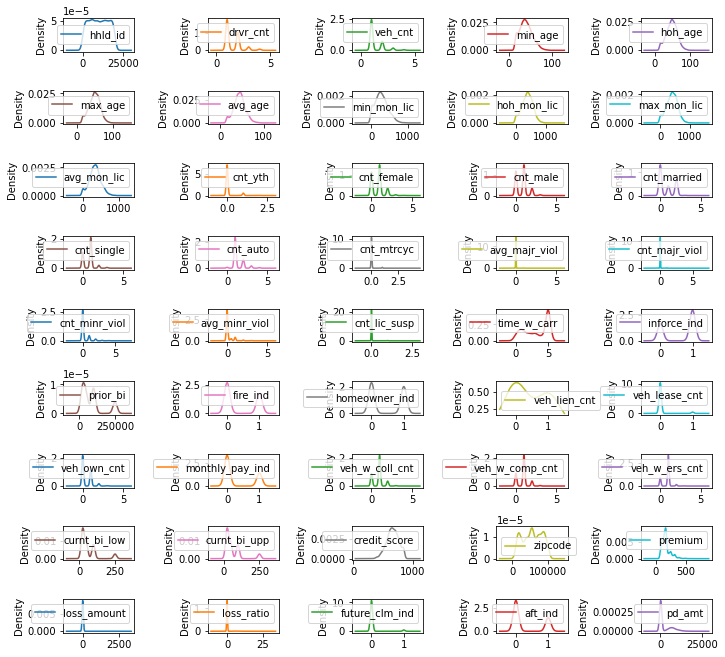

In [61]:
cont_col.plot(kind = 'kde', sharex = False, subplots = True, layout = (10,5), figsize = (10,10))
plt.tight_layout()
plt.show()

In [62]:
for i in cont_col.columns:
    print(i, cont_col[i].skew().round(2))

hhld_id 0.0
drvr_cnt 1.33
veh_cnt 1.89
min_age 0.46
hoh_age -0.04
max_age -0.08
avg_age 0.11
min_mon_lic 0.46
hoh_mon_lic -0.04
max_mon_lic -0.09
avg_mon_lic 0.1
cnt_yth 3.58
cnt_female 0.7
cnt_male 0.65
cnt_married 0.56
cnt_single 0.81
cnt_auto 1.66
cnt_mtrcyc 7.6
avg_majr_viol 14.76
cnt_majr_viol 13.7
cnt_minr_viol 2.83
avg_minr_viol 3.3
cnt_lic_susp 10.54
time_w_carr -0.38
inforce_ind -0.6
prior_bi 1.34
fire_ind 0.43
homeowner_ind 0.14
veh_lien_cnt 0.37
veh_lease_cnt 4.53
veh_own_cnt 1.3
monthly_pay_ind 0.89
veh_w_coll_cnt 0.43
veh_w_comp_cnt 0.42
veh_w_ers_cnt 0.17
curnt_bi_low 2.12
curnt_bi_upp 2.12
credit_score -0.22
zipcode -0.08
premium 1.58
loss_amount 5.52
loss_ratio 6.45
future_clm_ind 4.68
aft_ind 0.84
pd_amt 1.42


# Uni-variate Analysis

In [64]:
# distribution of aft_ind in %
# 70% of the 
cat_col['aft_ind'].value_counts() / len(cat_col) * 100


0    69.394435
1    30.605565
Name: aft_ind, dtype: float64

<AxesSubplot:>

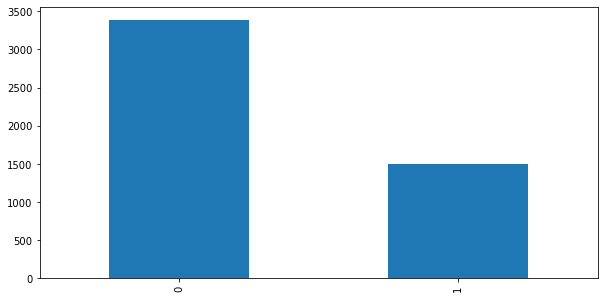

In [66]:
# graphical representation
cat_col['aft_ind'].value_counts().plot(kind = 'bar', figsize = (10,5))

In [67]:
## distribution of claims in %
cat_col['curnt_insurer'].value_counts() / len(cat_col) * 100


# most of the curnt_insurer is Missing 36%
# least curnt_insurer is for AMERICAN FAMILY 3%

MISSING            35.699673
OTHER              17.900982
GEICO              10.761047
PROGRESSIVE         9.103928
ALLSTATE            9.063011
FARMERS             6.567103
LIBERTY MUTUAL      3.948445
NATIONWIDE          3.866612
AMERICAN FAMILY     3.089198
Name: curnt_insurer, dtype: float64

<AxesSubplot:>

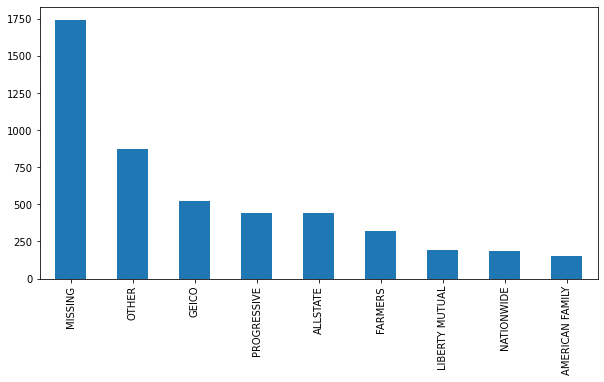

In [68]:
cat_col['curnt_insurer'].value_counts().plot(kind = 'bar', figsize = (10,5))

In [69]:
cat_col['future_clm_ind'].value_counts() / len(cat_col) * 100

0    95.969722
1     4.030278
Name: future_clm_ind, dtype: float64

<AxesSubplot:>

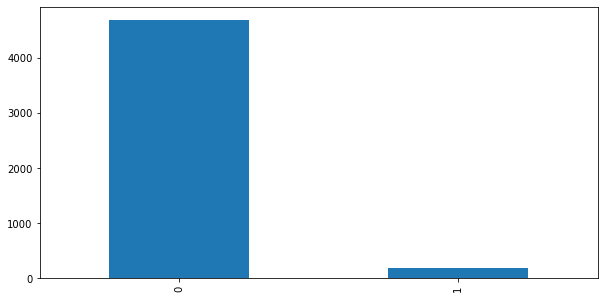

In [70]:
# graphical representation
cat_col['future_clm_ind'].value_counts().plot(kind = 'bar', figsize = (10,5))
## distribution of future_clm_ind in %

# Bi-variate Analysis

In [71]:
# categorical vs target
pd.crosstab(cat_col['aft_ind'], df1['future_clm_ind'])

future_clm_ind,0,1
aft_ind,,
0,3255,137
1,1436,60


<AxesSubplot:xlabel='aft_ind'>

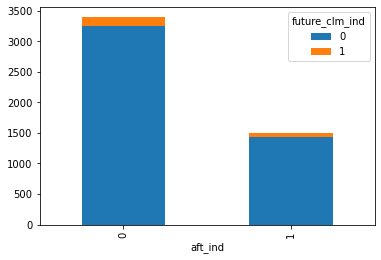

In [72]:
# graphical representation
pd.crosstab(cat_col['aft_ind'], df1['future_clm_ind']).plot.bar(stacked = True)

In [78]:
# curnt_insurer vs target
pd.crosstab(cat_col['curnt_insurer'], df1['future_clm_ind'])

future_clm_ind,0,1
curnt_insurer,,
ALLSTATE,409,34
AMERICAN FAMILY,146,5
FARMERS,297,24
GEICO,492,34
LIBERTY MUTUAL,180,13
MISSING,1745,0
NATIONWIDE,176,13
OTHER,817,58
PROGRESSIVE,429,16


<AxesSubplot:xlabel='curnt_insurer'>

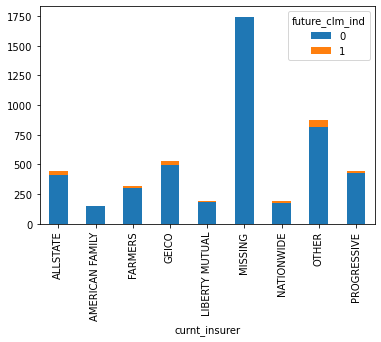

In [79]:
# graphical representation for 'curnt_insurer'
pd.crosstab(cat_col['curnt_insurer'], df1['future_clm_ind']).plot.bar(stacked = True)

In [80]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

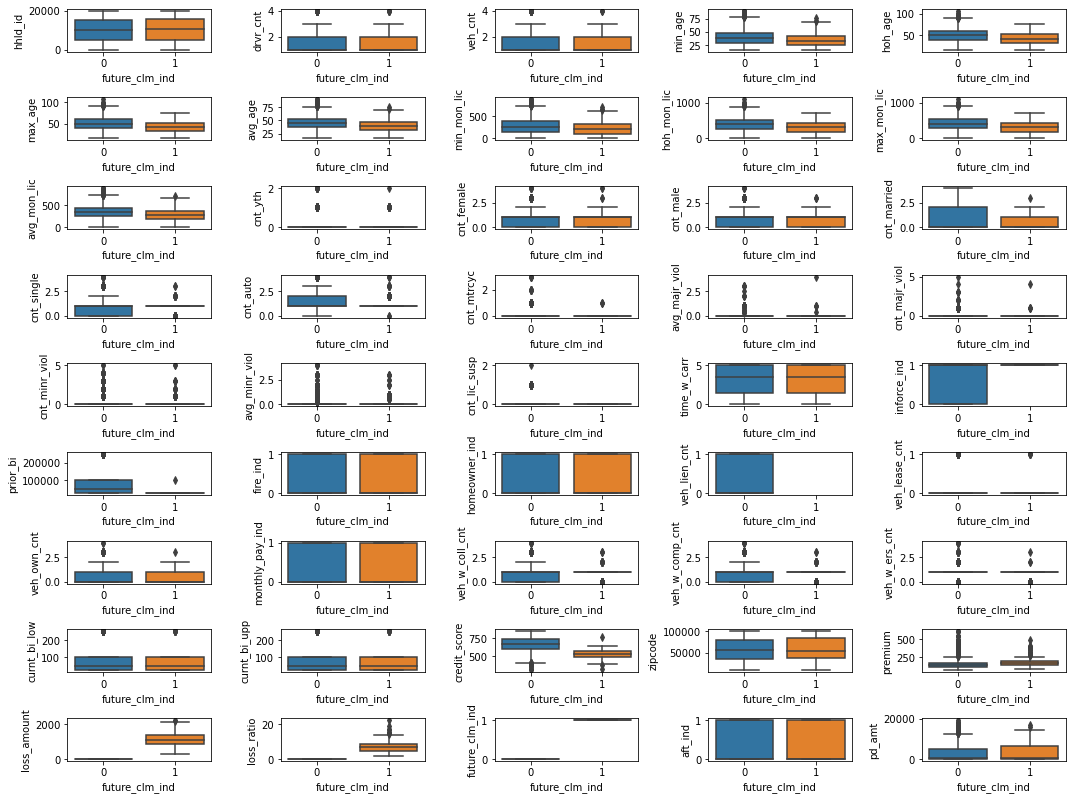

In [83]:
row = 10
col = 5
count = 1
plt.figure(figsize = (15,12))
for i in cont_col.columns:
    plt.subplot(row, col, count)
    sns.boxplot(x = df1['future_clm_ind'], y = cont_col[i])
    count += 1
plt.tight_layout()
plt.show()

In [84]:
# correlation matrix
cont_col.corr()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,aft_ind,pd_amt
hhld_id,1.000000,-0.015090,0.008851,0.017467,0.014217,0.008020,0.010393,0.017022,0.013422,0.007129,0.009392,-0.019578,-0.023911,0.009049,-0.006444,-0.007929,0.001787,0.022428,0.009756,0.004417,0.001528,0.018231,-0.027788,-0.008931,-0.001043,0.016096,0.007724,0.017600,-0.803403,0.014703,-0.008672,0.021076,0.016682,0.016390,-0.020764,0.002918,0.002918,0.009947,-0.005114,0.009210,-0.005491,0.007402,0.000475,-0.009167,-0.003539
drvr_cnt,-0.015090,1.000000,0.433367,-0.355790,0.278656,0.374836,0.107606,-0.353062,0.287694,0.382434,0.117565,0.163557,0.513527,0.489056,0.704939,0.137356,0.419656,0.011079,-0.025539,0.005794,0.127351,-0.063632,0.007010,0.021492,0.151905,0.011142,-0.005555,0.207317,0.353553,0.047383,0.169394,0.116167,0.198545,0.207442,-0.006765,0.044229,0.044229,0.116956,0.019354,0.351377,-0.016753,-0.038308,-0.024560,0.006820,0.001114
veh_cnt,0.008851,0.433367,1.000000,-0.145505,0.133698,0.175446,0.060676,-0.144240,0.138954,0.180191,0.065554,0.051888,0.200369,0.234483,0.330982,0.023935,0.952467,0.077588,-0.020617,-0.012136,0.058690,-0.024829,0.027105,0.017067,0.054300,0.007093,-0.000736,0.071566,1.000000,0.052863,0.440829,0.068379,0.449888,0.450030,-0.011336,0.155885,0.155885,0.061503,0.005285,0.847119,0.002780,-0.042490,-0.006545,-0.004695,0.000160
min_age,0.017467,-0.355790,-0.145505,1.000000,0.559084,0.517329,0.822172,0.998498,0.548714,0.507115,0.811932,-0.444422,-0.194085,-0.162436,-0.257589,-0.039403,-0.145499,0.011326,0.003306,-0.009315,-0.045484,0.015843,0.019874,-0.047096,-0.057715,0.015521,0.003353,-0.061448,0.080235,0.016068,-0.030480,-0.067244,-0.085986,-0.084138,-0.007625,-0.024257,-0.024257,-0.048556,-0.028916,-0.118910,-0.059910,-0.052953,-0.068904,-0.004469,-0.008787
hoh_age,0.014217,0.278656,0.133698,0.559084,1.000000,0.971646,0.889114,0.560163,0.995844,0.967348,0.888109,-0.199553,0.129949,0.149644,0.318076,-0.131600,0.122430,0.026452,-0.011718,0.001972,0.004732,-0.047375,0.007439,-0.032483,0.072972,0.015929,0.023975,0.077244,0.618946,0.034998,0.079522,0.015288,0.032969,0.044841,-0.029138,0.009585,0.009585,0.077476,-0.017957,0.085390,-0.085549,-0.095299,-0.096764,0.003622,-0.006143
max_age,0.008020,0.374836,0.175446,0.517329,0.971646,1.000000,0.880859,0.518551,0.968282,0.995896,0.880458,-0.175087,0.177928,0.198117,0.355102,-0.075411,0.162985,0.027101,-0.014571,0.000007,0.026709,-0.047092,0.004742,-0.026878,0.082302,0.019054,0.015649,0.092577,0.618946,0.039875,0.100604,0.021895,0.043142,0.056426,-0.035274,0.009205,0.009205,0.085185,-0.009366,0.114062,-0.090240,-0.100148,-0.101422,0.002890,-0.008424
avg_age,0.010393,0.107606,0.060676,0.822172,0.889114,0.880859,1.000000,0.822298,0.881950,0.873408,0.994264,-0.326991,0.044189,0.063878,0.099767,-0.018613,0.052692,0.021398,-0.007397,-0.001705,0.000184,-0.023198,0.015272,-0.036510,0.030485,0.018151,0.009045,0.036986,0.463452,0.038693,0.050430,-0.012768,-0.001303,0.007651,-0.026247,-0.001853,-0.001853,0.033680,-0.022992,0.033923,-0.087246,-0.089927,-0.098701,-0.003946,-0.013640
min_mon_lic,0.017022,-0.353062,-0.144240,0.998498,0.560163,0.518551,0.822298,1.000000,0.553955,0.512453,0.817381,-0.442226,-0.191664,-0.162139,-0.255679,-0.039010,-0.144717,0.012807,0.004388,-0.008194,-0.045448,0.015000,0.020983,-0.048098,-0.057829,0.014102,0.003271,-0.061862,0.080235,0.016239,-0.029681,-0.067100,-0.085192,-0.083807,-0.007604,-0.022895,-0.022895,-0.047815,-0.028726,-0.117954,-0.060190,-0.053546,-0.069545,-0.003817,-0.008134
hoh_mon_lic,0.013422,0.287694,0.138954,0.548714,0.99

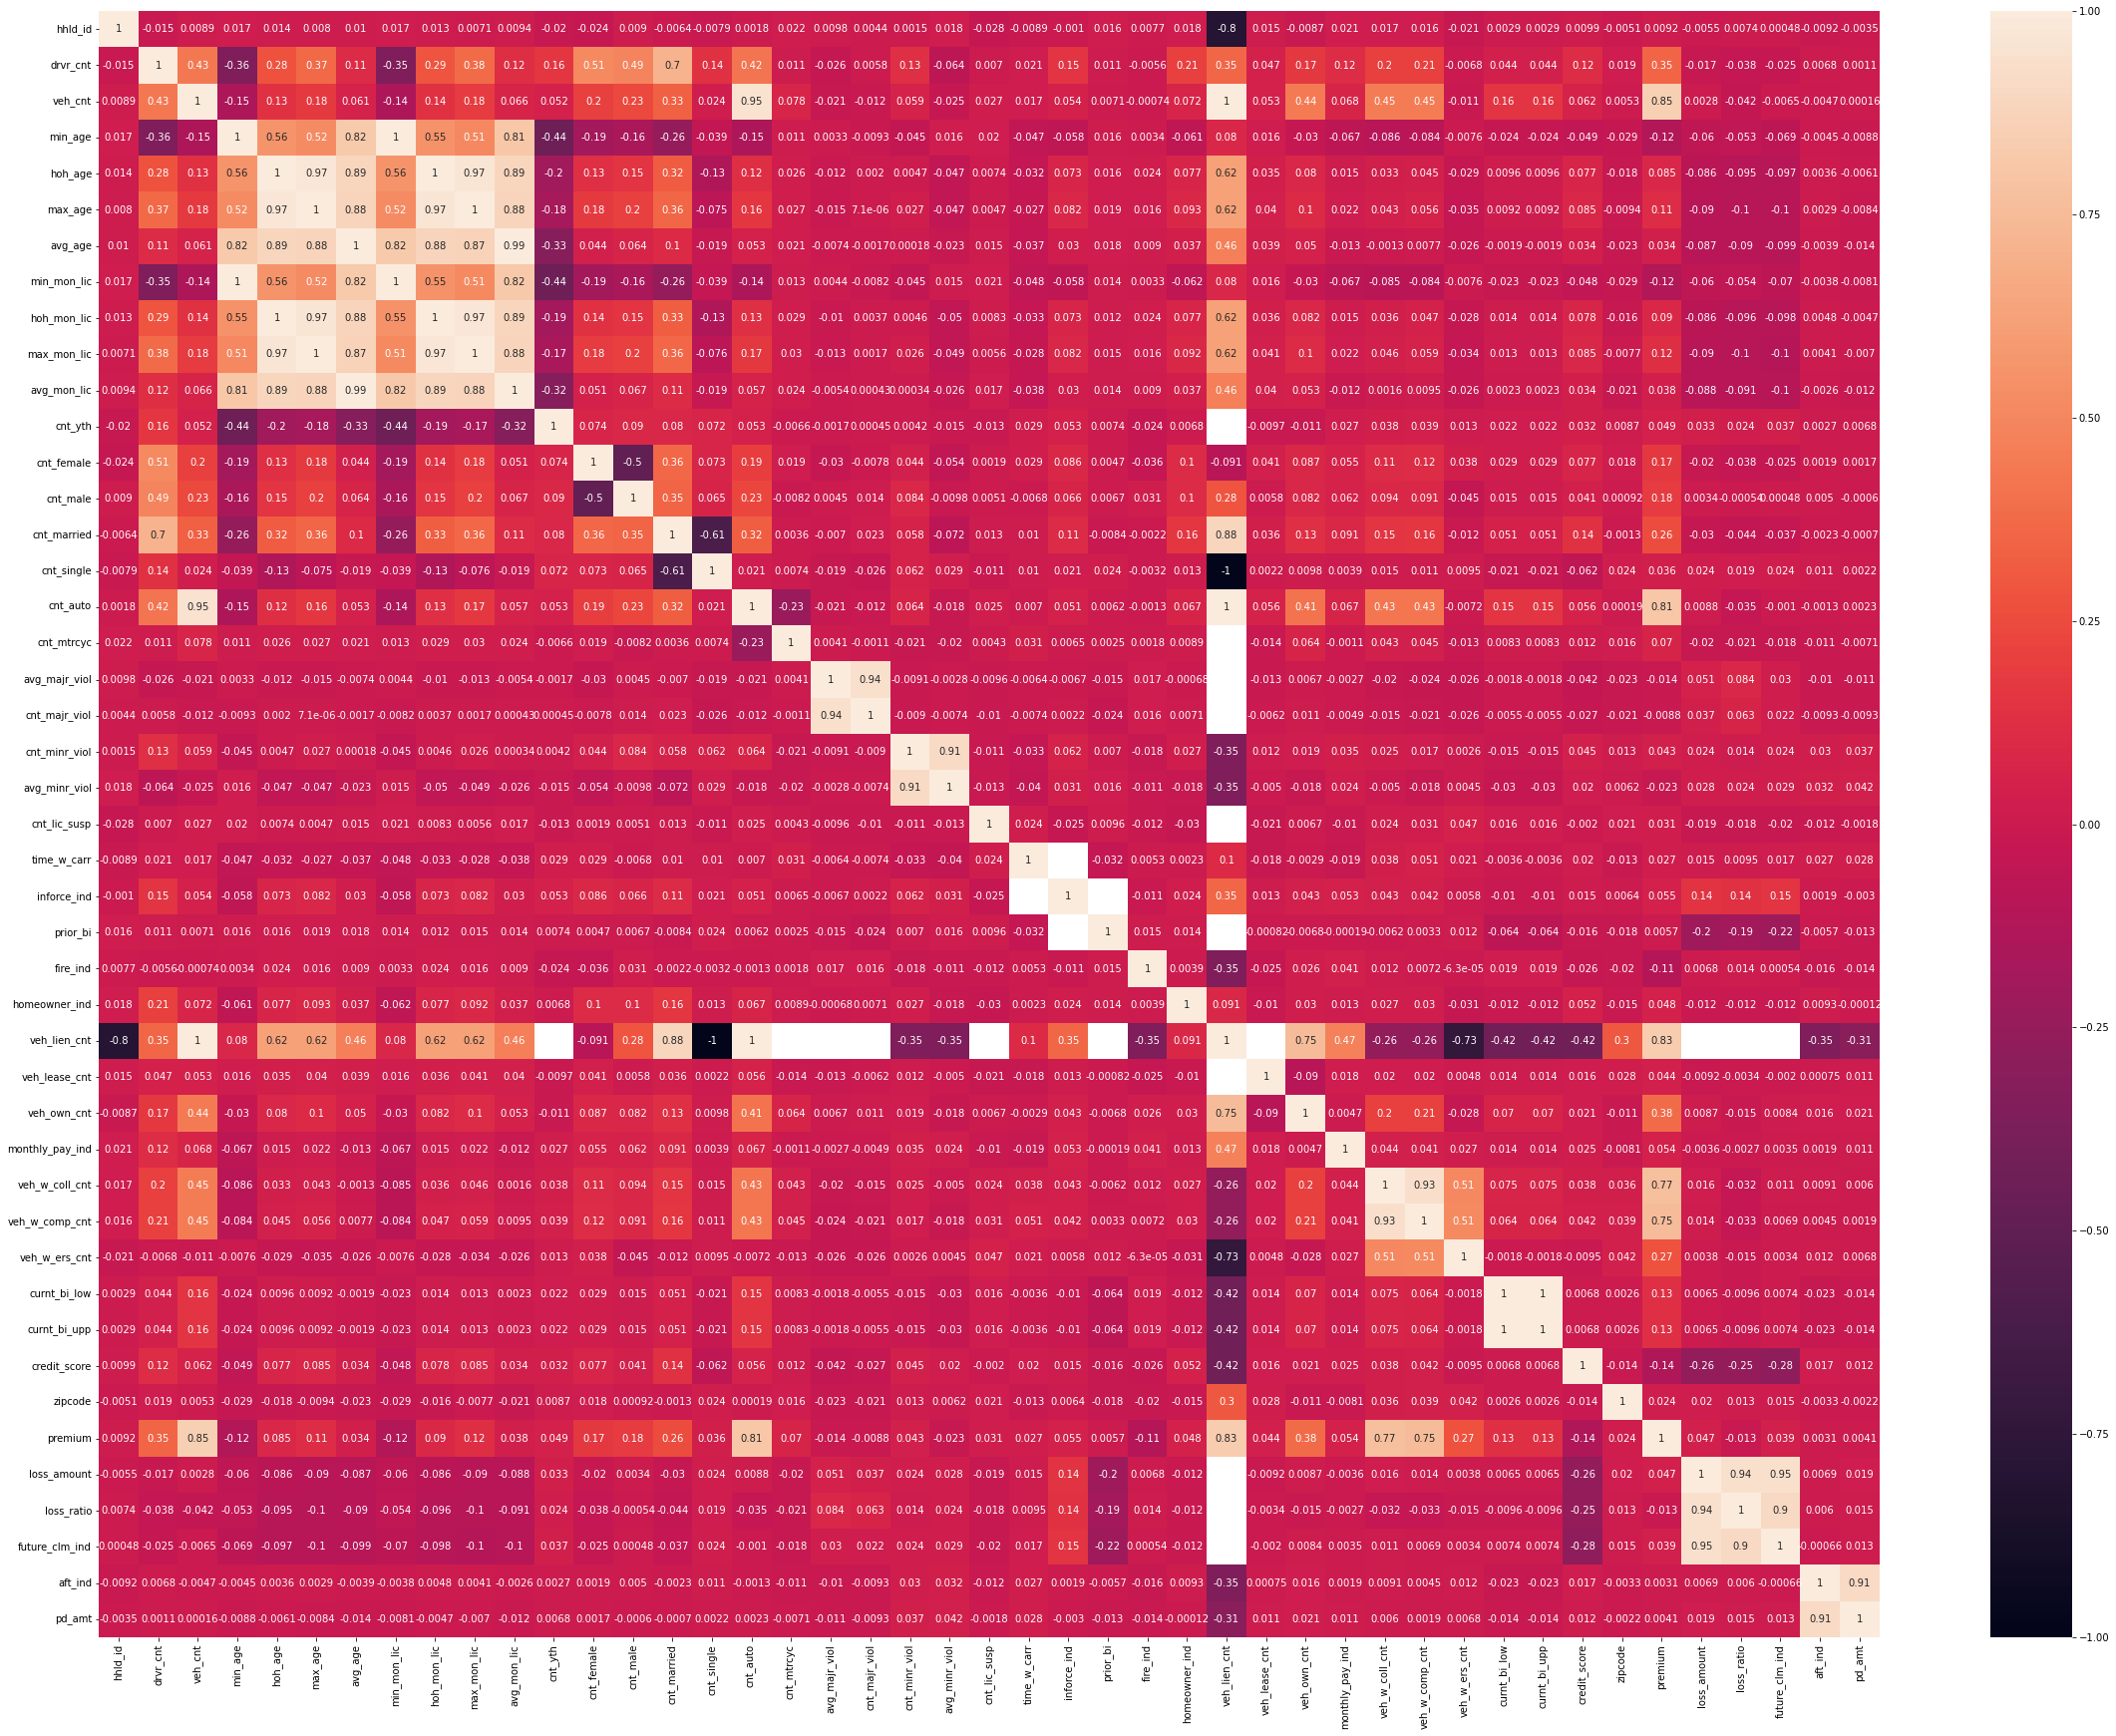

In [85]:
# graphical representation of correlation b/w numerical columns
plt.figure(figsize = (40,30))
sns.heatmap(cont_col.corr(), annot = True)
plt.show()

# Outlier Analysis

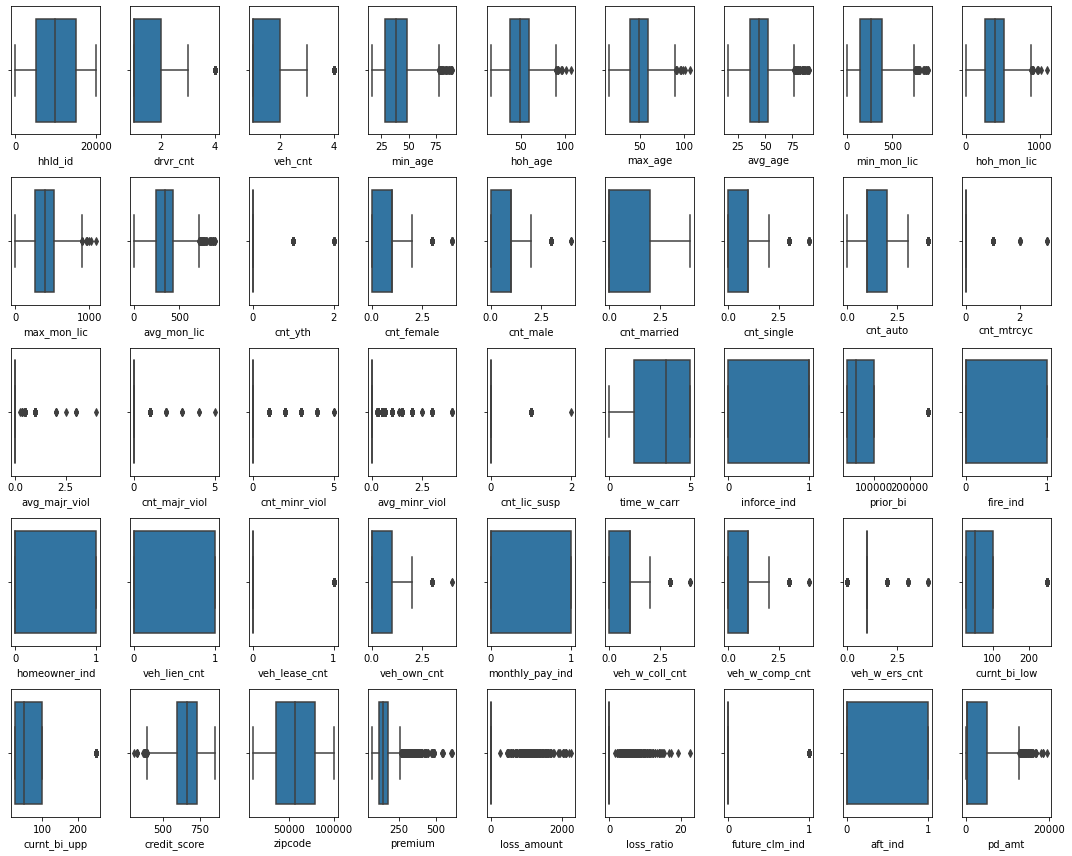

In [86]:
row = 5
col = 9
count = 1
plt.figure(figsize = (15,12))
for i in cont_col.columns:
    plt.subplot(row, col, count)
    sns.boxplot(cont_col[i])
    count += 1
plt.tight_layout()
plt.show()

In [96]:
# capping outliers
for i in cont_col.columns:
    q1 = cont_col[i].quantile(0.25)
    q3 = cont_col[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    uc = cont_col[i].quantile(0.99)
    lc = cont_col[i].quantile(0.01)
    for row in cont_col[i].index:
        if cont_col.loc[row, i] > ub:
            cont_col.loc[row, i] = uc
        if cont_col.loc[row, i] < lb:
            cont_col.loc[row, i] = lc

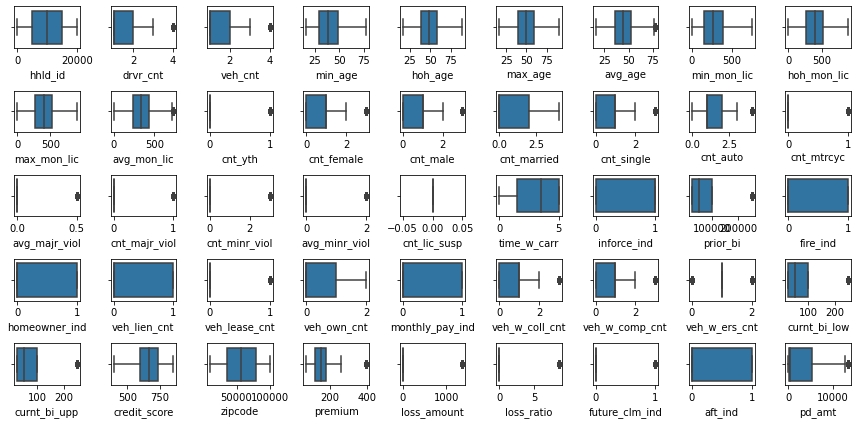

In [97]:
# outliers removed through capping method
row = 5
col = 9
count = 1
plt.figure(figsize = (12,6))
for i in cont_col.columns:
    plt.subplot(row, col, count)
    sns.boxplot(cont_col[i])
    count += 1
plt.tight_layout()
plt.show()


# Standard Scaler

In [98]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in cont_col:
    cont_col[i] = sc.fit_transform(cont_col[i].values.reshape(-1,1))
cont_col.head()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,aft_ind,pd_amt
0,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,-0.664107,-0.655310
1,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,1.505782,0.457234
2,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,-0.664107,-0.595882
3,0.324228,3.462622,2.519144,-1.379829,-0.302351,-0.339262,-0.527826,-1.370108,-0.284160,-0.320654,-0.505785,-0.287843,1.727882,1.775790,1.403087,1.964793,2.508235,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,0.979044,0.745119,-0.500834,-0.807409,1.069953,NaN,-0.210819,-0.723770,-0.649746,1.841411,1.827032,-1.799735,-0.655717,-0.655717,-2.520019,-1.503541,2.636296,-0.204928,-0.204928,-0.204928,-0.664107,-0.618676
4,-0.147923,0.656472,0.982252,-0.962570,-0.401608,-0.437537,-0.828697,-0.952506,-0.382887,-0.418327,-0.805774,-0.287843,-1.093998,1.775790,1.403087,-1.241319,1.007959,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.911254,0.745119,-0.838628,1.238530,-0.934620,NaN,-0.210819,2.643948,-0.649746,1.841411,1.827032,0.347996,0.602189,0.602189,-0.514804,1.146527,2.636296,4.879773,4.879773,4.879773,-0.664107,-0.594446


# Encoding categorical features

In [99]:
# one hot encoding
cat_col = pd.get_dummies(cat_col, columns=['curnt_insurer'], drop_first = True)
cat_col.head()

,future_clm_ind,aft_ind,curnt_insurer_AMERICAN FAMILY,curnt_insurer_FARMERS,curnt_insurer_GEICO,curnt_insurer_LIBERTY MUTUAL,curnt_insurer_MISSING,curnt_insurer_NATIONWIDE,curnt_insurer_OTHER,curnt_insurer_PROGRESSIVE
0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


# x and y variables


In [100]:
cat_col['aft_ind'] = cat_col['aft_ind'].astype('int')

# input variables
x = pd.concat([cont_col, cat_col], axis = 1)
x.head()

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lien_cnt,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,future_clm_ind,aft_ind,pd_amt,future_clm_ind,aft_ind,curnt_insurer_AMERICAN FAMILY,curnt_insurer_FARMERS,curnt_insurer_GEICO,curnt_insurer_LIBERTY MUTUAL,curnt_insurer_MISSING,curnt_insurer_NATIONWIDE,curnt_insurer_OTHER,curnt_insurer_PROGRESSIVE
0,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,-0.664107,-0.655310,0,0,0,0,0,0,0,0,0,1
1,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,1.505782,0.457234,0,1,0,0,0,0,0,0,0,1
2,1.024589,0.656472,-0.554639,0.333770,0.204631,0.162707,0.240302,0.344899,0.220114,0.178235,0.260089,-0.287843,1.727882,-1.074337,0.276006,0.361737,-0.492316,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.101126,0.745119,-0.838628,-0.807409,-0.934620,-0.866025,-0.210819,-0.723770,-0.649746,0.220226,0.215023,0.347996,0.602189,0.602189,1.638538,-0.756607,-0.462654,-0.204928,-0.204928,-0.204928,-0.664107,-0.595882,0,0,0,0,0,0,0,0,0,1
3,0.324228,3.462622,2.519144,-1.379829,-0.302351,-0.339262,-0.527826,-1.370108,-0.284160,-0.320654,-0.505785,-0.287843,1.727882,1.775790,1.403087,1.964793,2.508235,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,0.979044,0.745119,-0.500834,-0.807409,1.069953,NaN,-0.210819,-0.723770,-0.649746,1.841411,1.827032,-1.799735,-0.655717,-0.655717,-2.520019,-1.503541,2.636296,-0.204928,-0.204928,-0.204928,-0.664107,-0.618676,0,0,0,0,0,0,0,0,0,0
4,-0.147923,0.656472,0.982252,-0.962570,-0.401608,-0.437537,-0.828697,-0.952506,-0.382887,-0.418327,-0.805774,-0.287843,-1.093998,1.775790,1.403087,-1.241319,1.007959,-0.172345,-0.12313,-0.12313,-0.495649,-0.495649,0.0,-0.911254,0.745119,-0.838628,1.238530,-0.934620,NaN,-0.210819,2.643948,-0.649746,1.841411,1.827032,0.347996,0.602189,0.602189,-0.514804,1.146527,2.636296,4.879773,4.879773,4.879773,-0.664107,-0.594446,1,0,0,0,0,0,0,0,0,0


In [101]:
# target variable
y = df1['future_clm_ind']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: future_clm_ind, dtype: object

# SMOTE

In [105]:
y.value_counts(normalize = True)

# target variable distribution
# 0 - 96% 
# 1 - 4%

0    0.959697
1    0.040303
Name: future_clm_ind, dtype: float64

In [106]:
y.value_counts()

# target variable distribution
# 0 - 4691
# 1 - 197

0    4691
1     197
Name: future_clm_ind, dtype: int64

In [108]:
# SMOTE
x_sm, y_sm = SMOTE().fit_resample(x,y)

ValueError: Unknown label type: 'unknown'

In [ ]:
y_sm.value_counts(normalize = True)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split

# Logistic Regression

In [ ]:
# Base Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 101)

lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [ ]:
print('Training data score:',rf.score(x_train, y_train).round(2))
print('Testing data score:',rf.score(x_test, y_test).round(2))
print('Log Loss:',log_loss(y_test, y_pred).round(2))

In [ ]:
print(classification_report(y_test, y_pred))

# Decision Tree

In [ ]:
# Base Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

In [ ]:
print('Training data score:',dt.score(x_train, y_train).round(2))
print('Testing data score:',dt.score(x_test, y_test).round(2))
print('Log Loss:',log_loss(y_test, y_pred).round(2))

In [ ]:
print(classification_report(y_test, y_pred))

# Random Forest

In [ ]:
# Base Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [ ]:
print('Training data score:',rf.score(x_train, y_train).round(2))
print('Testing data score:',rf.score(x_test, y_test).round(2))
print('Log Loss:',log_loss(y_test, y_pred).round(2))

In [ ]:
print(classification_report(y_test, y_pred))

# KNN

In [ ]:
# Base Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [ ]:
print('Training data score:',knn.score(x_train, y_train).round(2))
print('Testing data score:',knn.score(x_test, y_test).round(2))
print('Log Loss:',log_loss(y_test, y_pred).round(2))

In [ ]:
print(classification_report(y_test, y_pred))

# Extreme Gradient Boost

In [ ]:
# Base Model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

xgb = XGBClassifier(random_state = 1)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [ ]:
print('Training data score:',xgb.score(x_train, y_train).round(2))
print('Testing data score:',xgb.score(x_test, y_test).round(2))
print('Log Loss:',log_loss(y_test, y_pred).round(2))

In [ ]:
print(classification_report(y_test, y_pred))